<h1 style="font-size:3rem;color:orange;">Linear Regression Test 1</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [2]:
math_df = pd.read_csv('../student_data/student-mat.csv')

In [3]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
math_df['G3'].sample(10)

78     10
371    12
248     5
55     10
390     9
223    13
42     18
234     6
316     0
116    14
Name: G3, dtype: int64

## Target G3 using all factors EXCEPT G1 and G2

In [5]:
X = math_df.drop(columns=['G1', 'G2', 'G3'])
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [6]:
y = math_df['G3']
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [7]:
# Now encode values that ARE NOT ALREADY numeric.
# Binary cols have only two categories (school, sex, address, etc) ~ use LabelEncoder
# Nominal cols have more 2 categories that have NO  ORDER (Mjob, Fjob) ~ use One-Hot Encoding
# Numeric cols (age, Medu, absences) are already numbers ~ No encoding needed

binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 
               'schoolsup', 'famsup', 'paid', 'activities', 
               'nursery', 'higher', 'internet', 'romantic']
nominal_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

for col in binary_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X = pd.get_dummies(X, columns=nominal_cols, drop_first=True)


# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# shapes of splitted data, sizes of X_train and y_train should be the same, same thing with tests
print(f"X_train: {X_train.shape}\n")
print(f"X_test: {X_test.shape}\n")
print(f"y_train: {y_train.shape}\n")
print(f"y_test: {y_test.shape}")

X_train: (316, 39)

X_test: (79, 39)

y_train: (316,)

y_test: (79,)


#### LR Implementation

In [9]:
def train_linear_regression(X_train, X_test, y_train, y_test, scale_factors=True):

    print("=" * 50)
    print("LINEAR REGRESSION MODEL WITHOUT G1 AND G2")
    print("=" * 50)

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # RMSE
    rmse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))

    # MAE
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # R²
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Print metrics
    print(f"Training R²: {r2_train:.4f}")
    print(f"Testing R²: {r2_test:.4f}")
    print(f"Training MAE: {mae_train:.4f}")
    print(f"Testing MAE: {mae_test:.4f}")
    print(f"Training RMSE: {rmse_train:.4f}")
    print(f"Testing RMSE: {rmse_test:.4f}")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"Cross-validation R² scores: {cv_scores}")
    print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    return model, y_pred_test, X_train.columns if scale_factors else None

model, predictions, factor_names = train_linear_regression(X_train, X_test, y_train, y_test)

LINEAR REGRESSION MODEL WITHOUT G1 AND G2
Training R²: 0.2888
Testing R²: 0.1415
Training MAE: 2.9462
Testing MAE: 3.3953
Training RMSE: 3.8651
Testing RMSE: 4.1957
Cross-validation R² scores: [ 0.11086819 -0.07964419 -0.20674031  0.03987995 -0.25474937]
Mean CV R²: -0.0781 (+/- 0.2791)


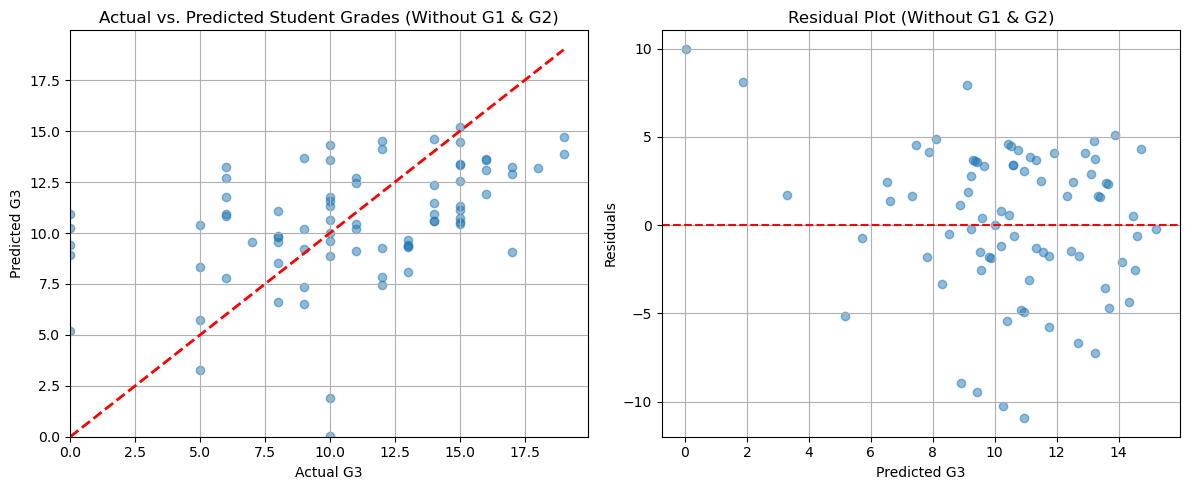

In [10]:
def plot_regression_results(y_true, y_pred):
    """
    Plot actual vs predicted values
    """
    plt.figure(figsize=(12, 5))
    
    # Scatter plot: Actual vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual G3')
    plt.ylabel('Predicted G3')
    plt.title('Actual vs. Predicted Student Grades (Without G1 & G2)')
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.grid(True)
    
    # Residual plot
    plt.subplot(1, 2, 2)
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted G3')
    plt.ylabel('Residuals')
    plt.title('Residual Plot (Without G1 & G2)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


plot_regression_results(y_test, predictions)